In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
from scipy.signal import find_peaks, argrelextrema

In [3]:
path = "E:\\NIT J\\Minor_Project_Group_20\\DATA_BTPm_Group20"
os.chdir(path)

In [4]:
os.getcwd()

'E:\\NIT J\\Minor_Project_Group_20\\DATA_BTPm_Group20'

In [5]:
class1_files = os.listdir('Class_1/')
class2_files = os.listdir('Class_2/')

In [6]:
print(class1_files)
print()
print(class2_files)

['H1.mat', 'H2.mat', 'H3.mat', 'H4.mat', 'H5.mat', 'H6.mat', 'Student10_post.mat', 'Student12_post.mat', 'Student13_post.mat', 'Student14_post.mat', 'Student15_post.mat', 'Student1_post.mat', 'Student3_post.mat', 'Student4_post.mat', 'Student5_post.mat', 'Student6_post.mat', 'Student8_post.mat', 'Student9_post.mat']

['s01840ry.mat', 's01855ry.mat', 's02458ry.mat', 's02513ry.mat', 's02586ry.mat', 's02858ry.mat', 's02906ry.mat', 's03039ry.mat', 's03617ry.mat', 's03744ry.mat', 's04802ry.mat', 's04906ry.mat', 's05345ry.mat', 's06581ry.mat', 's06692ry.mat', 's07614ry.mat', 's08141ry.mat', 's08142ry.mat', 's08281ry.mat', 's08318ry.mat', 's09258ry.mat', 's09993ry.mat', 's11187ry.mat', 's11431ry.mat', 's11727ry.mat', 's12878ry.mat', 's15480ry.mat', 's15488ry.mat', 's16112ry.mat', 's17582ry.mat', 's17795ry.mat', 's18642ry.mat', 's18970ry.mat', 's19578ry.mat']


In [7]:
print("No of Healthy Subjects i.e class1 subjects:", len(class1_files))
print("No of Unhealthy Subjects i.e class1 subjects:", len(class2_files))

No of Healthy Subjects i.e class1 subjects: 18
No of Unhealthy Subjects i.e class1 subjects: 34


## Understanding Subject 1 

In [8]:
h1 = scipy.io.loadmat(('Class_1/'+class1_files[0]))

In [9]:
h1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pSS', 'tSS', 'tSS_per', 'TSS'])

In [10]:
pSS = np.array(h1['pSS'])
tSS = np.array(h1['tSS'])

print("shape of pSS:", pSS.shape)
print("shape of tSS:", tSS.shape)

shape of pSS: (1861, 1)
shape of tSS: (1, 1861)


In [11]:
pSS

array([[113.88049978],
       [113.3901799 ],
       [112.91708545],
       ...,
       [ 80.79035499],
       [ 80.63380342],
       [ 80.54689813]])

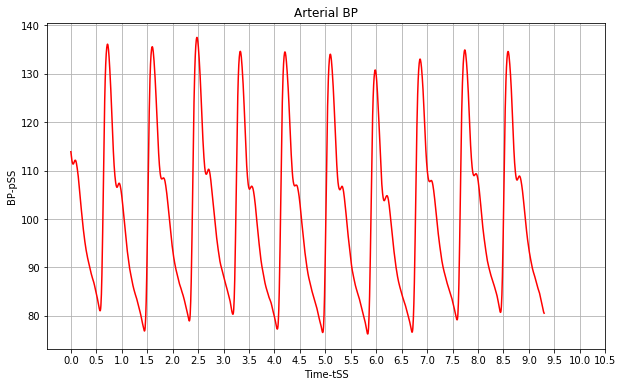

In [12]:
plt.figure(figsize=(10,6))
plt.plot(tSS.transpose(), pSS, "-r")
plt.xticks(np.arange(0, 11, 0.5))
plt.title("Arterial BP")
plt.xlabel("Time-tSS")
plt.ylabel("BP-pSS")
plt.grid(True)

In [13]:
pSS.transpose()[0]

array([113.88049978, 113.3901799 , 112.91708545, ...,  80.79035499,
        80.63380342,  80.54689813])

In [14]:
peak_idx, _ = find_peaks(pSS.transpose()[0])
peak_idx

array([  17,  144,  190,  320,  364,  496,  541,  666,  711,  841,  886,
       1020, 1066, 1196, 1242, 1372, 1416, 1548, 1592, 1718, 1763],
      dtype=int64)

In [15]:
# pSS[peak_idx], tSS.transpose()[peak_idx]

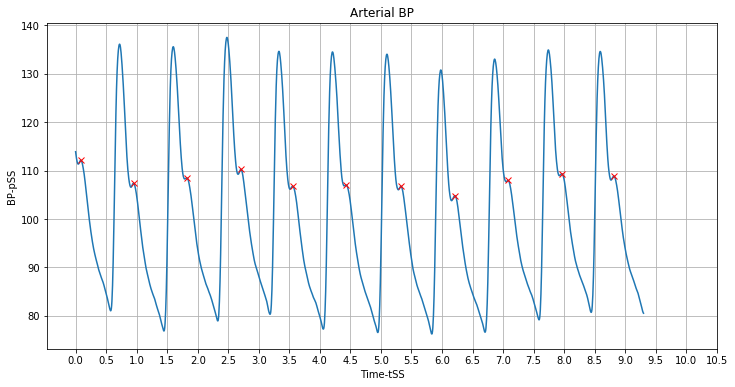

In [16]:
pidx, _ = find_peaks(pSS.transpose()[0], height=(80, 130))

plt.figure(figsize=(12,6))
plt.plot(tSS.transpose(), pSS)
# plt.plot(pSS)
plt.plot(tSS.transpose()[pidx], pSS[pidx], "xr")
plt.xticks(np.arange(0, 11, 0.5))
plt.title("Arterial BP")
plt.xlabel("Time-tSS")
plt.ylabel("BP-pSS")
plt.grid(True)
plt.show()

In [17]:
maxima_peaks = argrelextrema(pSS[:, 0], np.greater)  #return tuple of maxima along every axis
maxima_peaks[0] 

array([  17,  144,  190,  320,  364,  496,  541,  666,  711,  841,  886,
       1020, 1066, 1196, 1242, 1372, 1416, 1548, 1592, 1718, 1763],
      dtype=int64)

In [18]:
peak_idx 

array([  17,  144,  190,  320,  364,  496,  541,  666,  711,  841,  886,
       1020, 1066, 1196, 1242, 1372, 1416, 1548, 1592, 1718, 1763],
      dtype=int64)

In [19]:
pidx

array([  17,  190,  364,  541,  711,  886, 1066, 1242, 1416, 1592, 1763],
      dtype=int64)

In [20]:
minima_peaks = argrelextrema(pSS[:, 0], np.less)
minima_peaks[0]

array([   9,  115,  181,  289,  357,  466,  532,  637,  702,  811,  880,
        990, 1057, 1167, 1231, 1341, 1410, 1518, 1585, 1689, 1754],
      dtype=int64)

In [21]:
local_min = []
for x in minima_peaks[0]:
    if pSS[x]<100:
        local_min.append(x)
local_min

[115, 289, 466, 637, 811, 990, 1167, 1341, 1518, 1689]

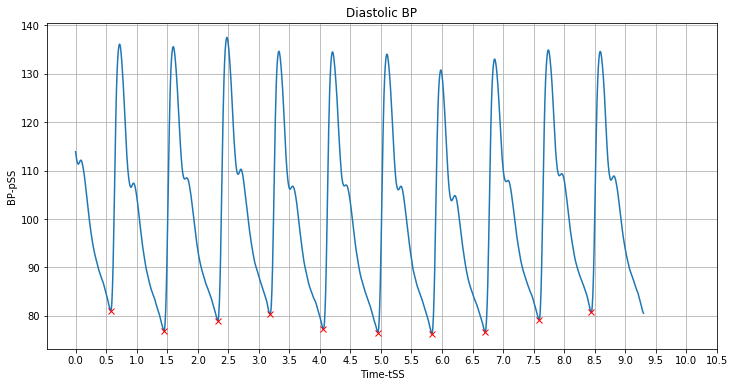

In [22]:
plt.figure(figsize=(12,6))
plt.plot(tSS.transpose(), pSS)
# plt.plot(pSS)
plt.plot(tSS.transpose()[local_min], pSS[local_min], "xr")
plt.xticks(np.arange(0, 11, 0.5))
plt.title("Diastolic BP")
plt.xlabel("Time-tSS")
plt.ylabel("BP-pSS")
plt.grid(True)
plt.show()

## Plot the systolics of all the subjects

In [23]:
def plot_pSS(tSS, pSS, pidx):
    plt.figure(figsize=(12,6))
    plt.plot(tSS.transpose(), pSS)
    # plt.plot(pSS)
    plt.plot(tSS.transpose()[pidx], pSS[pidx], "xr")
    plt.xticks(np.arange(0, 11, 0.5))
    plt.title("Arterial BP")
    plt.xlabel("Time-tSS")
    plt.ylabel("BP-pSS")
    plt.grid(True)
    plt.show()

In [24]:
def systolic_peaks(pSS, tSS, hmin=120, hmax=None, prominence=None, width=None):
    systolic_peak_idx, _ = find_peaks(pSS.transpose()[0], height=(hmin, hmax), prominence=prominence, width=width)
    plot_pSS(tSS, pSS, systolic_peak_idx)
    return systolic_peak_idx

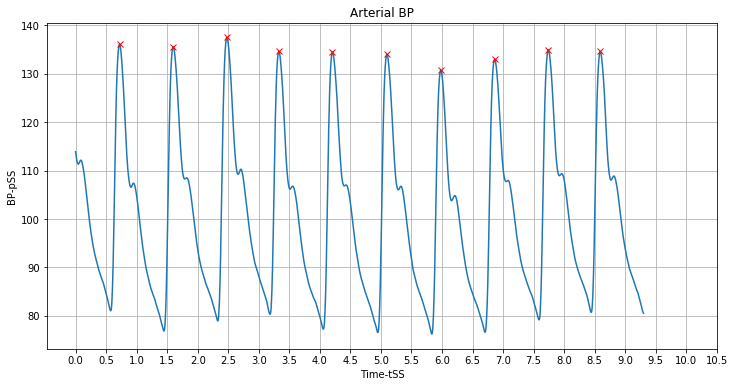

In [25]:
h1 = scipy.io.loadmat(('Class_1/'+class1_files[0]))
pSS = h1['pSS']
tSS = h1['tSS']
h1_peaks = systolic_peaks(pSS, tSS)

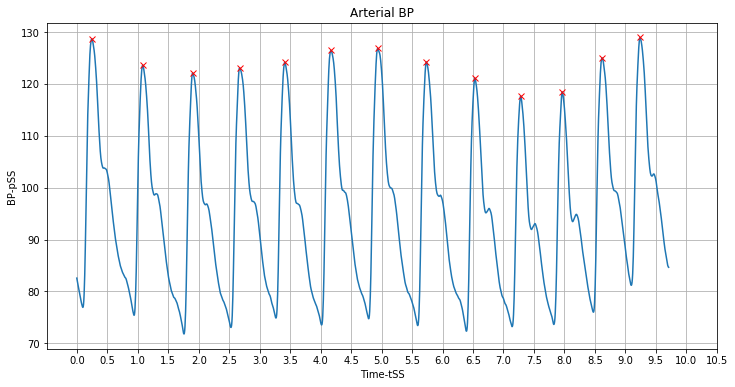

In [26]:
h2 = scipy.io.loadmat(('Class_1/'+class1_files[1]))
pSS = h2['pSS']
tSS = h2['tSS']
h2_peaks = systolic_peaks(pSS, tSS, 110)

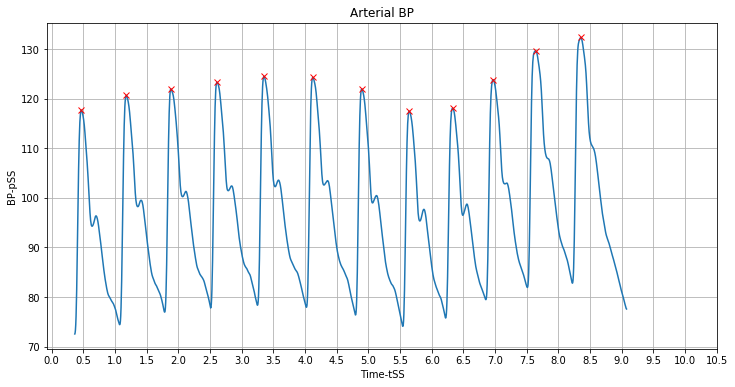

In [27]:
h3 = scipy.io.loadmat(('Class_1/'+class1_files[2]))
pSS = h3['pSS']
tSS = h3['tSS']
h3_peaks = systolic_peaks(pSS, tSS, 110)

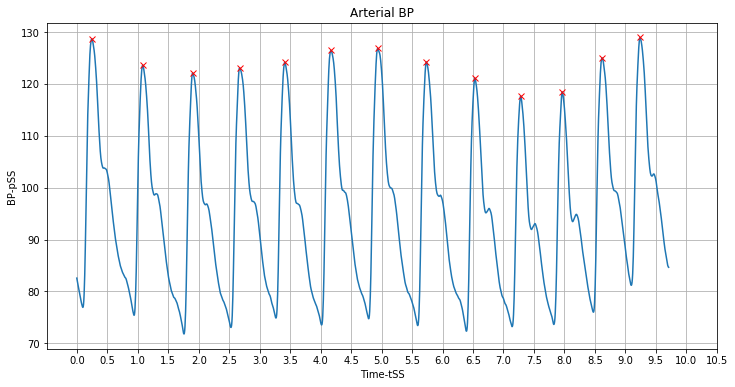

In [28]:
h4 = scipy.io.loadmat(('Class_1/'+class1_files[3]))
pSS = h4['pSS']
tSS = h4['tSS']
h4_peaks = systolic_peaks(pSS, tSS, 110)

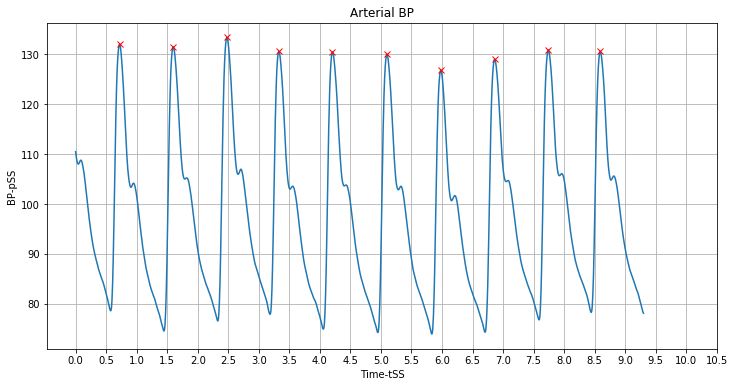

In [29]:
h5 = scipy.io.loadmat(('Class_1/'+class1_files[4]))
pSS = h5['pSS']
tSS = h5['tSS']
h5_peaks = systolic_peaks(pSS, tSS, 110)

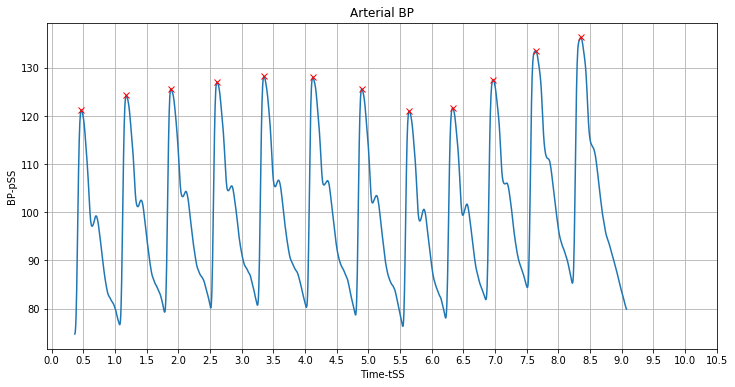

In [30]:
h6 = scipy.io.loadmat(('Class_1/'+class1_files[5]))
pSS = h6['pSS']
tSS = h6['tSS']
h6_peaks = systolic_peaks(pSS, tSS, 110)

In [31]:
h1_peaks, h2_peaks, h3_peaks, h4_peaks, h5_peaks, h6_peaks

(array([ 144,  320,  496,  666,  841, 1020, 1196, 1372, 1548, 1718],
       dtype=int64),
 array([  49,  216,  380,  534,  683,  834,  987, 1147, 1306, 1457, 1593,
        1724, 1848], dtype=int64),
 array([  21,  163,  303,  449,  597,  752,  906, 1056, 1193, 1321, 1455,
        1598], dtype=int64),
 array([  49,  216,  380,  534,  683,  834,  987, 1147, 1306, 1457, 1593,
        1724, 1848], dtype=int64),
 array([ 144,  320,  496,  666,  841, 1020, 1196, 1372, 1548, 1718],
       dtype=int64),
 array([  21,  163,  303,  449,  597,  752,  906, 1056, 1193, 1321, 1455,
        1598], dtype=int64))

In [32]:
h5_peaks == h1_peaks

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [33]:
h2_peaks == h4_peaks

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [34]:
h6_peaks == h3_peaks

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

* as they are repeating we will consider only h1_peaks, h2_peaks and h3_peaks

In [35]:
class1_files[6:]

['Student10_post.mat',
 'Student12_post.mat',
 'Student13_post.mat',
 'Student14_post.mat',
 'Student15_post.mat',
 'Student1_post.mat',
 'Student3_post.mat',
 'Student4_post.mat',
 'Student5_post.mat',
 'Student6_post.mat',
 'Student8_post.mat',
 'Student9_post.mat']

dict_keys(['__header__', '__version__', '__globals__', 't', 'pAo', 'HR', 'tHR', 't_per', 'p_per'])
pSS shape: (2001, 1)
tSS shape: (1, 2001)


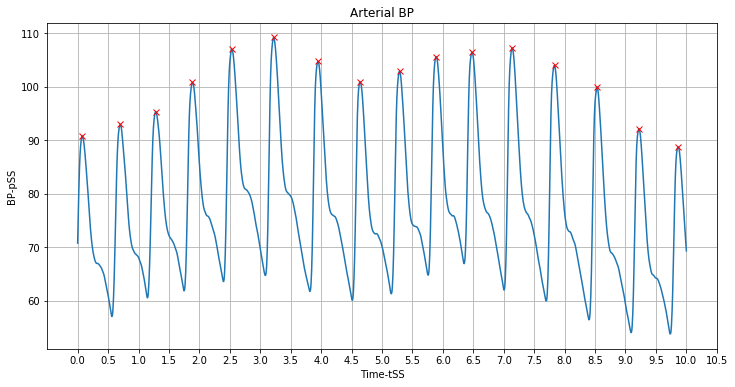

In [36]:
h7 = scipy.io.loadmat(('Class_1/'+class1_files[6]))
print(h7.keys())
try:
    pSS = h7['pSS']
except:
    pSS = h7['pAo']
    pSS = pSS.transpose()

try:
    tSS = h7['tSS']
except:
    tSS = h7['t']
print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h7_peaks = systolic_peaks(pSS, tSS, 85)

dict_keys(['__header__', '__version__', '__globals__', 't', 'pAo', 'HR', 'tHR', 't_per', 'p_per'])
pSS shape: (2001, 1)
tSS shape: (1, 2001)


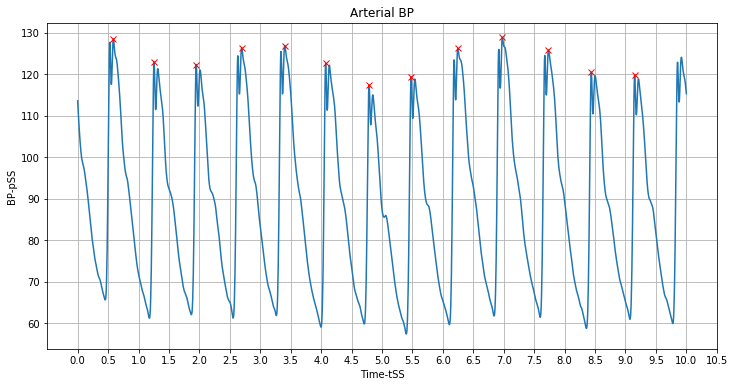

In [37]:
h8 = scipy.io.loadmat(('Class_1/'+class1_files[7]))
print(h8.keys())
try:
    pSS = h8['pSS']
except:
    pSS = h8['pAo']
    pSS = pSS.transpose()

try:
    tSS = h8['tSS']
except:
    tSS = h8['t']
print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h8_peaks = systolic_peaks(pSS, tSS, 100 , width=15)

dict_keys(['__header__', '__version__', '__globals__', 't', 'pAo', 'HR', 'tHR', 't_per', 'p_per'])
pSS shape: (2001, 1)
tSS shape: (1, 2001)


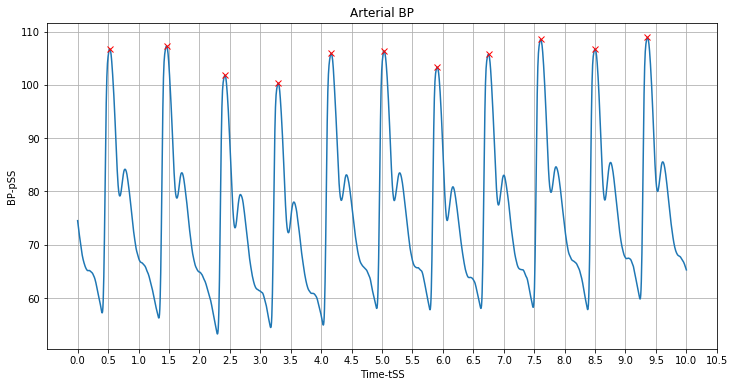

In [38]:
h9 = scipy.io.loadmat(('Class_1/'+class1_files[8]))
print(h9.keys())
try:
    pSS = h9['pSS']
except:
    pSS = h9['pAo']
    pSS = pSS.transpose()

try:
    tSS = h9['tSS']
except:
    tSS = h9['t']
print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h9_peaks = systolic_peaks(pSS, tSS, 95)

pSS shape: (2001, 1)
tSS shape: (1, 2001)


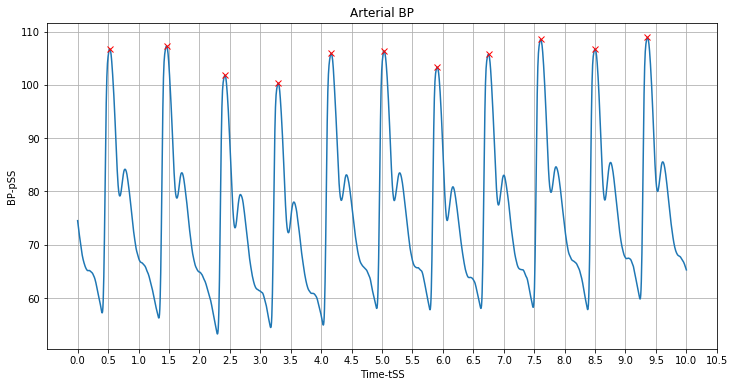

In [39]:
h9 = scipy.io.loadmat(('Class_1/'+class1_files[8]))
# print(h8.keys())
# try:
#     pSS = h8['pSS']
# except:
pSS = h9['pAo']
pSS = pSS.transpose()

# try:
#     tSS = h8['tSS']
# except:
tSS = h9['t']
print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h9_peaks = systolic_peaks(pSS, tSS, 100)

pSS shape: (2201, 1)
tSS shape: (1, 2201)


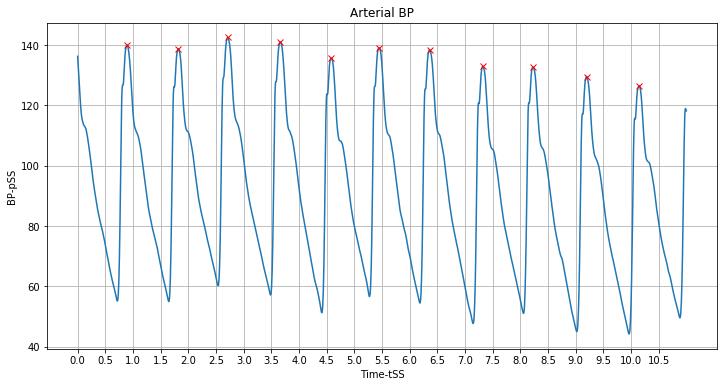

In [40]:
h10 = scipy.io.loadmat(('Class_1/'+class1_files[9]))

pSS = h10['pAo']
pSS = pSS.transpose()

tSS = h10['t']

print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h10_peaks = systolic_peaks(pSS, tSS, 100, prominence=30)

pSS shape: (2601, 1)
tSS shape: (1, 2601)


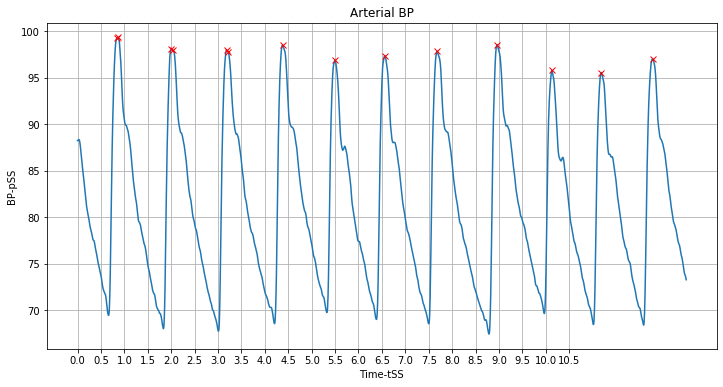

In [41]:
h11 = scipy.io.loadmat(('Class_1/'+class1_files[10]))

pSS = h11['pAo']
pSS = pSS.transpose()

tSS = h11['t']

print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h11_peaks = systolic_peaks(pSS, tSS, 95)

pSS shape: (2001, 1)
tSS shape: (1, 2001)


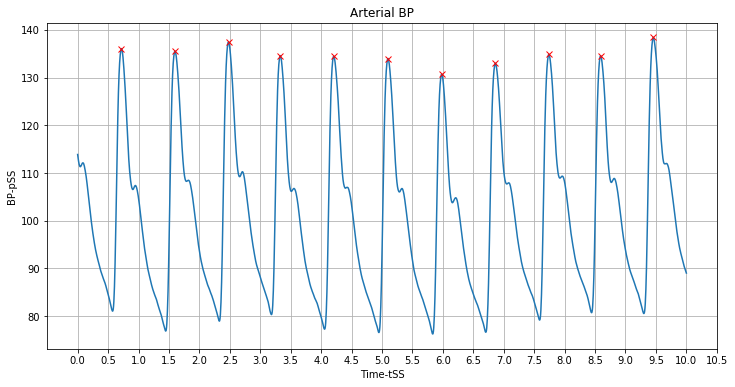

In [42]:
h12 = scipy.io.loadmat(('Class_1/'+class1_files[11]))

pSS = h12['pAo']
pSS = pSS.transpose()

tSS = h12['t']

print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h12_peaks = systolic_peaks(pSS, tSS, 120)

pSS shape: (2001, 1)
tSS shape: (1, 2001)


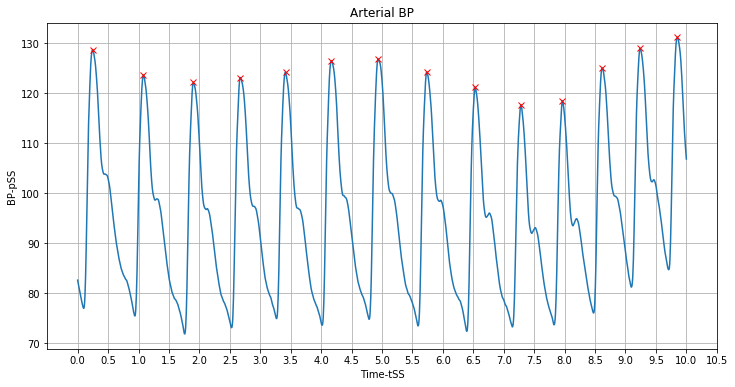

In [43]:
h13 = scipy.io.loadmat(('Class_1/'+class1_files[12]))

pSS = h13['pAo']
pSS = pSS.transpose()

tSS = h13['t']

print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h13_peaks = systolic_peaks(pSS, tSS, 110)

pSS shape: (2001, 1)
tSS shape: (1, 2001)


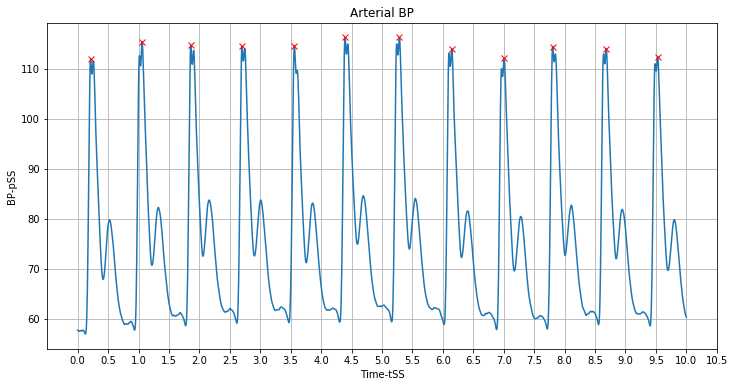

In [44]:
h14 = scipy.io.loadmat(('Class_1/'+class1_files[13]))

pSS = h14['pAo']
pSS = pSS.transpose()

tSS = h14['t']

print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h14_peaks = systolic_peaks(pSS, tSS, 100, prominence=20)

pSS shape: (1401, 1)
tSS shape: (1, 1401)


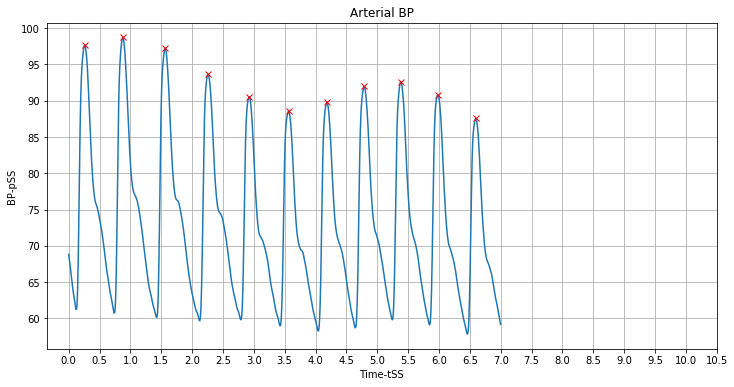

In [45]:
h15 = scipy.io.loadmat(('Class_1/'+class1_files[14]))

pSS = h15['pAo']
pSS = pSS.transpose()

tSS = h15['t']

print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h15_peaks = systolic_peaks(pSS, tSS, 85)

pSS shape: (2001, 1)
tSS shape: (1, 2001)


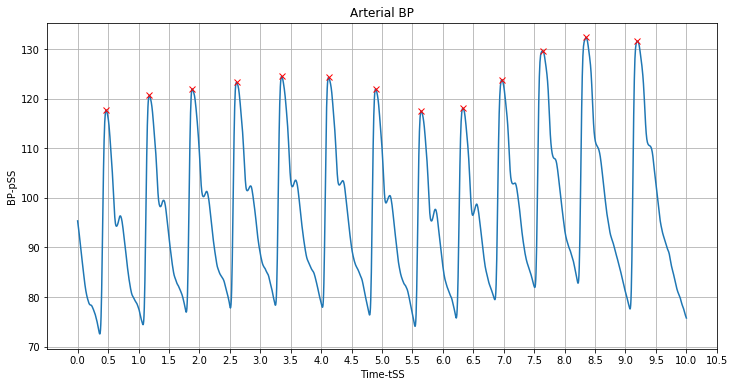

In [46]:
h16 = scipy.io.loadmat(('Class_1/'+class1_files[15]))

pSS = h16['pAo']
pSS = pSS.transpose()

tSS = h16['t']

print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h16_peaks = systolic_peaks(pSS, tSS, 110)

pSS shape: (2601, 1)
tSS shape: (1, 2601)


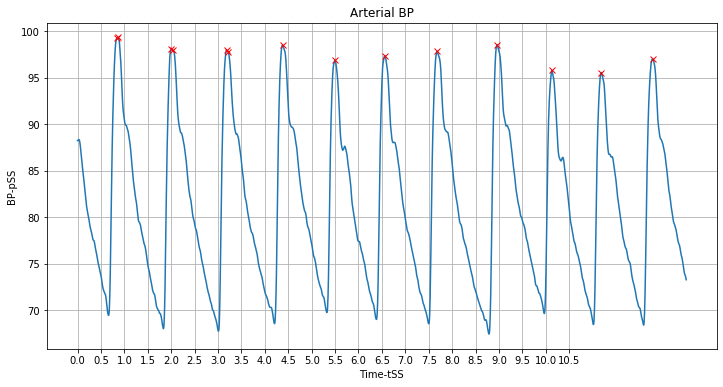

In [47]:
h17 = scipy.io.loadmat(('Class_1/'+class1_files[16]))

pSS = h17['pAo']
pSS = pSS.transpose()

tSS = h17['t']

print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h17_peaks = systolic_peaks(pSS, tSS, 92)

pSS shape: (2001, 1)
tSS shape: (1, 2001)


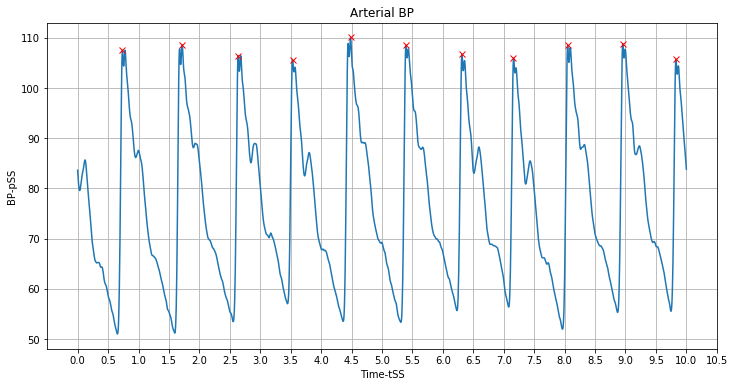

In [48]:
h18 = scipy.io.loadmat(('Class_1/'+class1_files[17]))

pSS = h18['pAo']
pSS = pSS.transpose()

tSS = h18['t']

print("pSS shape:", pSS.shape)
print("tSS shape:", tSS.shape)
h18_peaks = systolic_peaks(pSS, tSS, 95, prominence=15)

In [49]:
# list_of_subjects = []
# for i in range(len(class1_files)):
#     h = scipy.io.loadmat(('Class_1/'+class1_files[i]))
#     try:
#         pSS = h['pSS']
#     except:
#         pSS = h['pAo']
#         pSS = pSS.transpose()

    
#     try:
#         tSS = h['tSS']
#     except:
#         tSS = h['t']
        
#     print("pSS shape:", pSS.shape)
#     print("tSS shape:", tSS.shape)
#     h_peaks = systolic_peaks(pSS, tSS, 110)
#     list_of_subjects.append(h_peaks)

### Understandicg the kick in the cardiac cycle i.e the closure of the aortic value

In [53]:
pSS = np.array(h1['pSS'])
tSS = np.array(h1['tSS'])

minima_peaks_kick = argrelextrema(pSS[:, 0], np.less)
minima_peaks_kick[0]

array([   9,  115,  181,  289,  357,  466,  532,  637,  702,  811,  880,
        990, 1057, 1167, 1231, 1341, 1410, 1518, 1585, 1689, 1754],
      dtype=int64)

In [54]:
local_min_kick = []
for x in minima_peaks_kick[0]:
    if pSS[x]>100:
        local_min_kick.append(x)
local_min_kick

[9, 181, 357, 532, 702, 880, 1057, 1231, 1410, 1585, 1754]

[]

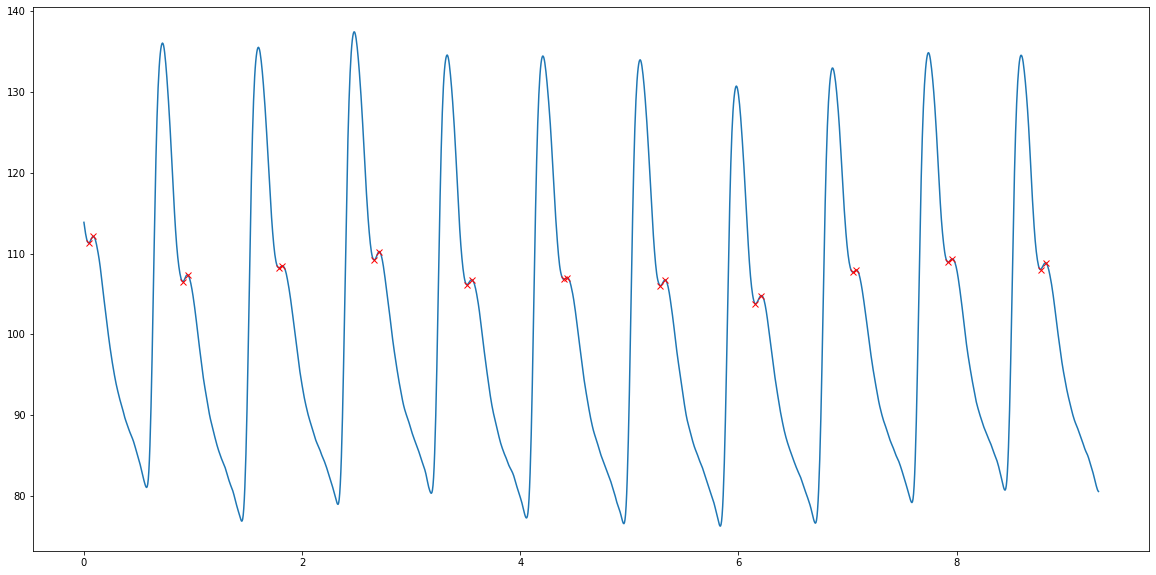

In [84]:
plt.figure(figsize=(20,10))
plt.plot(tSS.transpose(), pSS)
plt.plot(tSS.transpose()[local_min_kick], pSS[local_min_kick], "xr")
plt.plot(tSS.transpose()[pidx], pSS[pidx], "xr")
plt.plot()

In [68]:
pidx, np.array(local_min_kick)

(array([  17,  190,  364,  541,  711,  886, 1066, 1242, 1416, 1592, 1763],
       dtype=int64),
 array([   9,  181,  357,  532,  702,  880, 1057, 1231, 1410, 1585, 1754],
       dtype=int64))

In [71]:
kick_durations = tSS.transpose()[pidx] - tSS.transpose()[local_min_kick]

In [86]:
print("The average time for a kick to take place is {:.5f} seconds" .format(np.mean(kick_durations)))

The average time for a kick to take place is 0.04091 seconds
